# 1.1
## a)

In [2]:
import numpy as np
import pandas as pd
data = pd.read_csv('child.csv', sep=',', index_col=0)

## b)

In [4]:
data.shape

(30, 21)

# c)

In [5]:
summary = data.describe()
mean_median = summary.loc[['mean', '50%']] # median: 50% quantile
mean_median

,Average.disposable.income,Children.in.poor.homes,Educational.Deprivation,Overcrowding,Poor.environmental.conditions,Average.mean.literacy.score,Literacy.inequality,Youth.NEET.rate,Low.birth.weight,Infant.mortality,...,Vaccination.rates..pertussis.,Vaccination.rates.measles.,Physical.activity,Mortality.rates,Suicide.rates,Smoking,Drunkenness,Teenage.births,Bullying,Liking.school
mean,18.847713,12.372193,2.673333,31.950163,25.217498,496.317,1.665085,7.377778,6.643333,5.446667,...,93.775862,91.517241,20.134615,24.598966,6.856272,16.5125,15.225,15.5,10.979167,27.172
50%,21.107187,11.659053,1.500000,21.574977,25.487116,501.335,1.682739,6.200000,6.750000,4.200000,...,95.800000,94.000000,19.300000,23.150000,6.784772,16.6000,14.550,10.6,9.650000,25.600


## d)

In [8]:
has_netherlands = data.index.contains('Netherlands')
has_china = data.index.contains('China')
print("Has Netherlands? {}\nHas China? {}".format(has_netherlands, has_china))

Has Netherlands? True
Has China? False


## e)

In [24]:
data_sorted_by_drunkenness = data.sort_values(by=['Drunkenness'], ascending=False)
country = data_sorted_by_drunkenness.index[0]
drunkenness = data_sorted_by_drunkenness['Drunkenness'][0]
print('Most Drunkenness in: {} ({}% drunken >= 2 times)'.format(country, drunkenness))

Most Drunkenness in: Denmark (24.8% drunken >= 2 times)


## f)

In [32]:
lowest_infant_mortality = data.nsmallest(1, 'Infant.mortality')
country = lowest_infant_mortality.index[0]
infant_mortality = lowest_infant_mortality['Infant.mortality'][0]
print('Lowest Infant Mortality in: {} ({} per 1000)'.format(country, infant_mortality))

Lowest Infant Mortality in: Iceland (2.3 per 1000)


## g)

In [51]:
# data.columns: find out column names
countries = list(data[data['Physical.activity'] < data['Physical.activity'].mean()].index)
mean_physical_activity = data['Physical.activity'].mean()
print('Countries with below mean physical activity (< {}):'.format(mean_physical_activity), *countries)

Countries with below mean physical activity (< 20.134615384615383): Austria Belgium France Germany Greece Hungary Italy Luxembourg Mexico Norway Poland Portugal Sweden Switzerland Turkey United Kingdom


# 1.2
## a)

In [3]:
import numpy as np
import pandas as pd

fuel = pd.read_csv('fuel.csv', sep=',', index_col=0)

## b)

In [5]:
fuel.loc[5, :]

weight     2440
mpg          32
type      Small
Name: 5, dtype: object

## c)

In [6]:
fuel.loc[1:5, :]

,weight,mpg,type
X,,,
1,2560,33,Small
2,2345,33,Small
3,1845,37,Small
4,2260,32,Small
5,2440,32,Small


## d)

In [14]:
mean_mpg = fuel['mpg'].mean()
print('mean miles/gallon: {:.3f}'.format(mean_mpg))

mean miles/gallon: 24.583


## e)

In [13]:
mean_mpg_7_22 = fuel.loc[7:22, 'mpg'].mean()
print('mean miles/gallon (cars 7 to 22): {:.3f}'.format(mean_mpg_7_22))

mean miles/gallon (cars 7 to 22): 27.750


## f)

In [18]:
kilometers_per_mile = 1.6093
liters_per_gallon = 3.789
t_kml = fuel['mpg'] * kilometers_per_mile / liters_per_gallon

kilograms_per_pound = 0.45359
t_kg = fuel['weight'] * kilograms_per_pound

## g)

In [19]:
mean_kml = t_kml.mean()
mean_kg = t_kg.mean()
print('mean km/l: {:.3f}, mean kg: {:.3f}'.format(mean_kml, mean_kg))

mean km/l: 10.441, mean kg: 1315.789


# 1.3)

In [47]:
hectars = [2.1,2.4,2.8,3.1,4.2,4.9,5.1,6.0,6.4,7.3,10.8,12.5,13.0,13.7,14.8,17.6,19.6,23.0,25.0,35.2,39.6]
hectars_array = np.array(hectars)

## a)

In [14]:
hectars_sum = hectars_array.sum()
squared_sum = np.sum(hectars_array ** 2)
print('total hectars: {}, total squared hectars: {}'.format(hectars_sum, squared_sum))

total hectars: 269.1, total squared hectars: 5729.27


## b)

In [38]:
from math import floor, ceil, sqrt

sum_acc = 0
size = 0
for x in hectars:
    sum_acc += x
    size += 1
mean = sum_acc / size
print('mean: {:.3f}'.format(mean))

diff_sum = 0
for x in hectars:
    diff_sum += (x - mean) ** 2
var = diff_sum / (size - 1)
sd = sqrt(var)
print('sd: {:.3f}'.format(sd))

mean: 12.814
sd: 10.679


## c)

In [48]:
hectars.sort()
median = 0
n = len(hectars)
if (n % 2 == 1):
    median = hectars[int(n / 2)]
else:
    lower = floor(n / 2)
    upper = ceil(n / 2)
    median = (hectars[lower] + hectars[upper]) / 2
print('median: {:.3f}'.format(median))

median: 10.800


## d)

In [124]:
# NumPy
mean = hectars_array.mean()
std = hectars_array.std(ddof=1) # ddof=1: compute with divisor n-1 (Delta Degrees of Freedom)
median = np.median(np.sort(hectars_array))
q75 = np.percentile(hectars_array, q=75)
print('NumPy')
print('mean:\t{:.3f}\nstd:\t{:.3f}\nmedian:\t{:.3f}\nq75:\t{:.3f}'.format(mean, std, median, q75))

# Pandas
series = pd.Series(hectars)
mean = series.mean()
std = series.std() # computed with divisor n-1
median = series.median()
q75 = series.quantile(q=0.75)
print('\nPandas')
print('mean:\t{:.3f}\nstd:\t{:.3f}\nmedian:\t{:.3f}\nq75:\t{:.3f}'.format(mean, std, median, q75))

NumPy
mean:	12.814
std:	10.679
median:	10.800
q75:	17.600

Pandas
mean:	12.814
std:	10.679
median:	10.800
q75:	17.600


## e)

In [104]:
standardized = [(x - mean) / std for x in hectars]
standardized_array = np.array(standardized)
mean_standardized = standardized_array.mean()
print('mean (standardized variables): {:.3f}'.format(abs(mean_standardized)))

std_standardized = standardized_array.std(ddof=1)
print('empirical standard deviation: {:.3f}'.format(std_standardized))

# manually calculated
mean_standardized = standardized_array.mean()
acc = 0
n = 0
for z in standardized_array:
    acc += (z - mean_standardized) ** 2
    n += 1
empirical_std = sqrt(acc / (n-1))
print('empirical standard deviation: {:.3f}'.format(empirical_std))

mean (standardized variables): 0.000
empirical standard deviation: 1.000
empirical standard deviation: 1.000


# 1.4)

- 1: c
- 2: a
- 3: b

# 1.5)
## a)

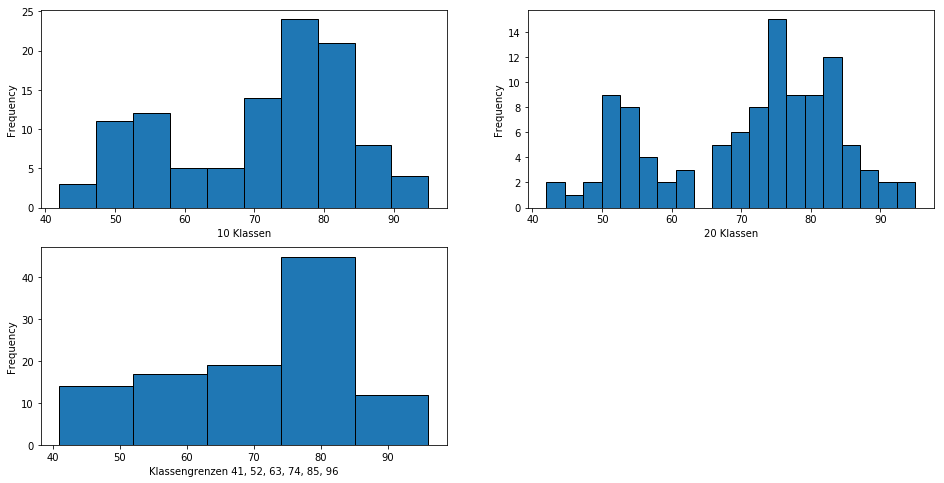

In [4]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = [16, 8]

geysir = pd.read_csv('geysir.csv', sep=' ', index_col=0)
geysir.head()

plt.subplot(221)
geysir['Zeitspanne'].plot(kind='hist', edgecolor='black')
plt.xlabel('10 Klassen') # default: 10

plt.subplot(222)
geysir['Zeitspanne'].plot(kind='hist', bins=20, edgecolor='black')
plt.xlabel('20 Klassen')

plt.subplot(223)
geysir['Zeitspanne'].plot(kind='hist', bins=np.arange(41, 107, 11), edgecolor='black')
plt.xlabel('Klassengrenzen 41, 52, 63, 74, 85, 96')

plt.show()

- Mit weniger Klassen lassen sich grobe Trends einfacher erkennen.
- Mit mehr Klassen sind feine Trends sichtbar, die mit weniger Klassen untergehen.

## b)

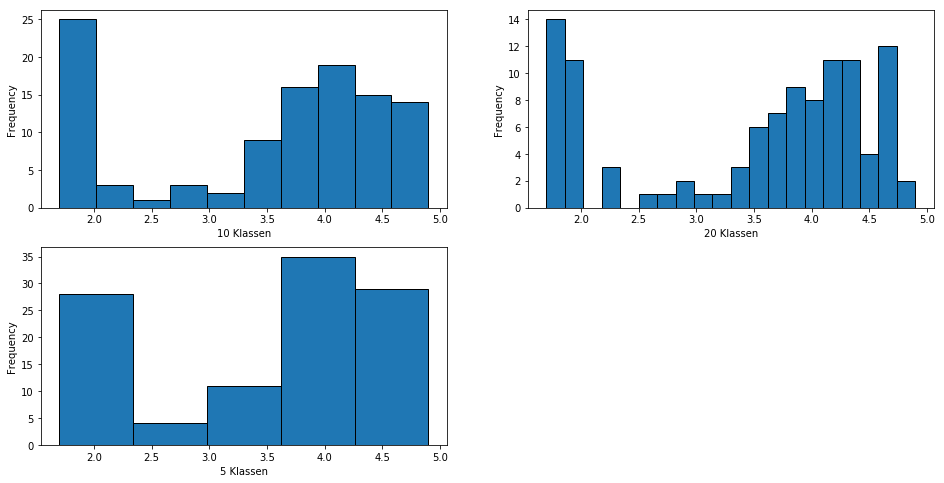

In [5]:
t_eruption = geysir['Eruptionsdauer']

for params in [(221, 10), (222, 20), (223, 5)]:
    plt.subplot(params[0])
    t_eruption.plot(kind='hist', bins=params[1], edgecolor='black')
    plt.xlabel('{} Klassen'.format(params[1]))
plt.show()

- Viele Messpunkte liegen bei den Extremen, nicht in der Mitte (wie bei der Zeitspanne).
- Die wichtigsten Trends (Konzentration an den Extremen) sind auf allen Plots etwa gleich gut ersichtlich.

## c)

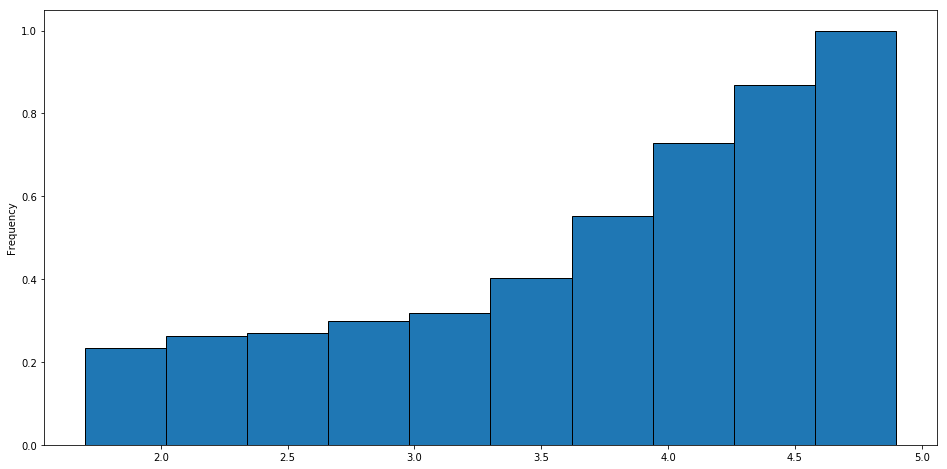

In [6]:
# normed=True is deprecated, use density instead
t_eruption.plot(kind='hist', density=True, cumulative=True, edgecolor='black')
plt.show()

- maximal 2 Minuten: ca. 25%
- Dauer der 60% längsten Eruptionen: 4-5 Minuten